In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import datetime
import pandas_datareader.data as web

In [67]:
start = datetime.datetime(2019, 9, 27)
end = datetime.datetime(2020, 10, 8)
btc = web.DataReader('BTC-USD','yahoo', start, end)

In [68]:
btc = btc[~btc.index.duplicated(keep='first')]

In [69]:
btc = btc.drop(columns=['High','Low','Open','Close','Volume'])

In [70]:
btc.columns = ['Price']

In [71]:
btc = btc.reset_index()

In [72]:
r = pd.date_range(start=btc.Date.min(), end=btc.Date.max())
btc = btc.set_index('Date').reindex(r).rename_axis('Date').reset_index()

In [73]:
btc['Date'] = pd.to_datetime(btc['Date'])
btc.set_index('Date',inplace=True)

In [74]:
btc = btc.fillna(method='ffill')
btc = btc.fillna(method='bfill')

In [75]:
btc = btc.loc['2019-09-27':'2020-10-08']

In [76]:
start = datetime.datetime(2019, 9, 27)
end = datetime.datetime(2020, 10, 8)
gold = web.DataReader('GC=F','yahoo', start, end)

In [77]:
gold = gold.loc['2019-09-27':'2020-10-08']

In [78]:
gold = gold.drop(columns=['High','Low','Open','Close','Volume'])

In [79]:
gold.columns = ['Price']

In [80]:
gold = gold.reset_index()

In [81]:
r = pd.date_range(start=gold.Date.min(), end=gold.Date.max())
gold = gold.set_index('Date').reindex(r).rename_axis('Date').reset_index()

In [82]:
gold['Date'] = pd.to_datetime(gold['Date'])
gold.set_index('Date',inplace=True)

In [83]:
gold = gold.fillna(method='ffill')
gold = gold.fillna(method='bfill')

In [84]:
np.corrcoef(btc['Price'],gold['Price'])

array([[1.        , 0.73572585],
       [0.73572585, 1.        ]])

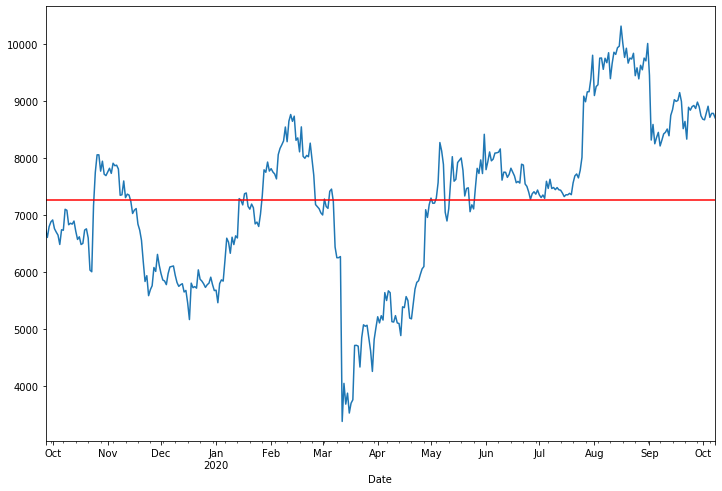

In [85]:
spread = btc['Price'] - gold['Price']
spread.plot(label='Spread',figsize=(12,8))
plt.axhline(spread.mean(),c='r');

In [86]:
def zscore(assets):
    return (assets-assets.mean()) / np.std(assets)

In [87]:
spread_mavg1 = spread.rolling(1).mean()

spread_mavg30 = spread.rolling(30).mean()

std_30 = spread.rolling(30).std()

zscore_30_1 = (spread_mavg1 - spread_mavg30)/std_30

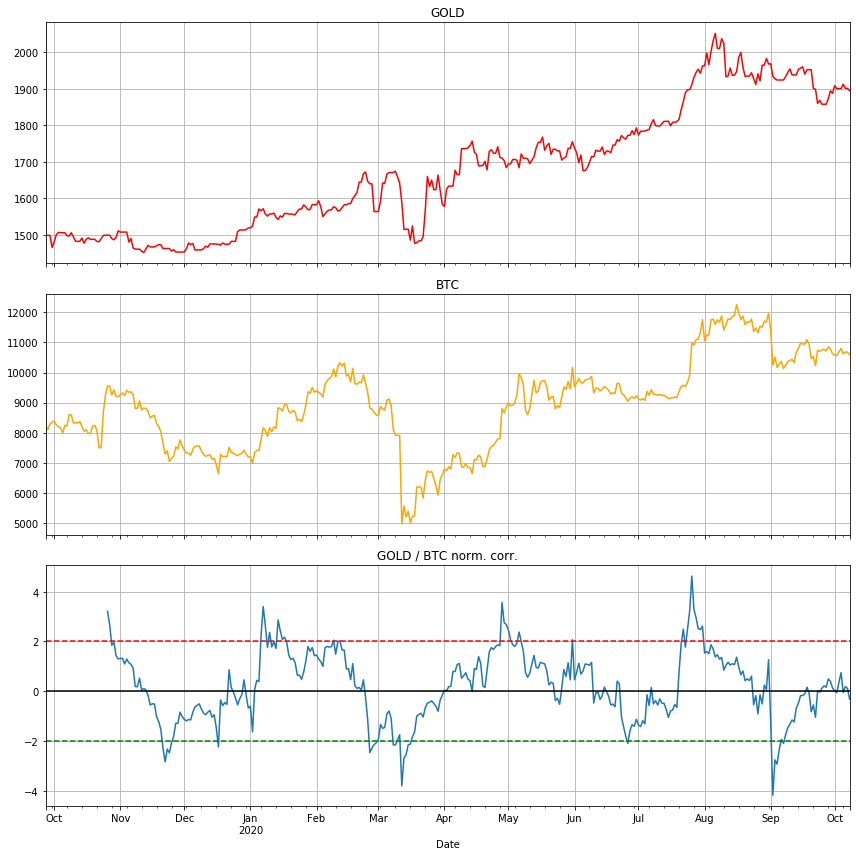

In [88]:
fig, axes = plt.subplots(3,1,sharex=True)
ax1 = axes[0]
ax2 = axes[1]
ax3 = axes[2]
#ax4 = axes[3]

gold['Price'].plot(ax=ax1,figsize=(24,24),grid=True,title='GOLD',xlim=['2019-09-27','2020-10-01'],color='red')

btc['Price'].plot(ax=ax2,grid=True,title='BTC',color='orange')

#zscore(spread).plot(ax=ax3,figsize=(24,24),grid=True,title='zscore')
#plt.axhline(zscore(spread).mean(),color='black')
#plt.axhline(1.0,c='g',ls='--')
#plt.axhline(-1.0,c='r',ls='--')

zscore_30_1.plot(ax=ax3,figsize=(12,12),grid=True,title='GOLD / BTC norm. corr.')
plt.axhline(0,color='black')
plt.axhline(2.0,color='red',ls='--')
plt.axhline(-2.0,color='g',ls='--')
plt.tight_layout()